# Ad Ease website Analytics

**Dataset:**
**Web Traffic Time Series Forecasting**

Forecasting the future values of multiple time series. More specifically the problem of forecasting future web traffic for approximately 145,000 articles on britanica.

The training dataset consists of approximately 145k time series. Each of these time series represent a number of daily views of a different article, starting from July, 1st, 2015 up until December 31st, 2016.
For each time series, you are provided the name of the article as well as the type of traffic that this time series represent (all, mobile, desktop, spider). You may use this metadata and any other publicly available data to make predictions. Unfortunately, the data source for this dataset does not distinguish between traffic values of zero and missing values. A missing value may mean the traffic was zero or that the data is not available for that day.


***Data Dictionary:***

there are two csv files given


**train_1.csv : **

In the csv file, each row corresponds to a particular article and each column correspond to a particular date. The values are the number of visits in that date.


**Exog_Campaign_eng : **

this file contaings data for the dates which had a campaign or significant event that could affect the views for that day.
the data is just for pages in english.

there is a 1 for dates with campaign and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in english

## Intent of the notebook

1. We will start by loading the data and handling the values.

2. Then some Exploratory data analysis to get an understanding of the data and get some useful insight, based on various parameters, and visualizing them.

3. Preparing the data for feeding to the model(checking stationarity, transformations).

4. Preparing the model followed by some predictions.

5. Comparing the same with the given data and calculating the accuracy of the model.






**Importing the libraries**

In [1]:
!pip install --upgrade --no-cache-dir gdown

You should consider upgrading via the 'C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [5]:
import gdown
#url='https://drive.google.com/file/d/1gHYYLqLt6rMyeAyvHf1wvlQ4BLKwjv9W/view?usp=sharing'
#url='https://drive.google.com/file/d/1SL_7DoE16m71QpjJXoQUC3cI5aHCIZLv/view?usp=share_link'
#url='https://drive.google.com/file/d/11GQSe2Xm4vFD4Xfw3JhOoPlXnBE_LiMe/view?usp=sharing'
url='https://drive.google.com/file/d/1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm/view?usp=sharing'

ider=url.split('/')[-2]
!gdown --id $ider

C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm
From (redirected): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm&confirm=t&uuid=8a7e3a7c-aff1-4165-b08f-95aebc90f30b
To: E:\1.SCALER\Classes\BusinessCase Studies\12.AdEase Time Series\new_train.csv

  0%|          | 0.00/425M [00:00<?, ?B/s]
  0%|          | 1.05M/425M [00:00<00:52, 8.08MB/s]
  0%|          | 2.10M/425M [00:00<00:57, 7.35MB/s]
  1%|          | 3.15M/425M [00:00<00:58, 7.19MB/s]
  1%|          | 4.19M/425M [00:00<01:15, 5.56MB/s]
  1%|1         | 5.24M/425M [00:00<01:32, 4.55MB/s]
  1%|1         | 5.77M/425M [00:01<01:57, 3.56MB/s]
  1%|1         | 6.29M/425M [00:01<02:36, 2.68MB/s]
  2%|1         | 7.34M/

In [6]:
train = pd.read_csv('new_train.csv')



Reading the dataset and printing head and tail to get basic idea

In [7]:
train.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.britanica.org_all-access_spider        18.0        11.0   
1             2PM_zh.britanica.org_all-access_spider        11.0        14.0   
2              3C_zh.britanica.org_all-access_spider         1.0         0.0   
3         4minute_zh.britanica.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.britanica.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


We can see that ther are some null values in the data, we will plot them to see how it looks

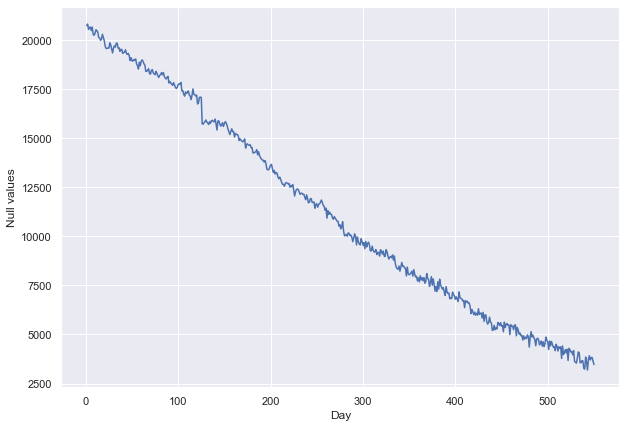

In [10]:

days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])

We see that the number of nan values decrease with time.

Probable reason: Some website have all nan values in the begining, that can be due to the fact that those were created after that time so there is no traffic reading for that time

In [11]:
print(train.shape)
train=train.dropna(how='all')
#‘all’ : If all values are NA, drop that row or column.
print(train.shape)

train=train.dropna(thresh=300)
print(train.shape)


(145063, 551)
(145063, 551)
(133617, 551)


1. We try droping the rows that have all values as nan, none in our case.

2. We then also drop rows that have nan more than 300 days, because the time series for that would not make much sense

3. We fill all the remaining values with zero assuming there was no traffic on the date that the values are nan for.


In [12]:
train=train.fillna(0)
train.tail()

Page  2015-07-01  \
145012  Legión_(Marvel_Comics)_es.britanica.org_all-ac...         0.0   
145013  Referéndum_sobre_la_permanencia_del_Reino_Unid...         0.0   
145014  Salida_del_Reino_Unido_de_la_Unión_Europea_es....         0.0   
145015  Amar,_después_de_amar_es.britanica.org_all-acc...         0.0   
145016  Anexo:89.º_Premios_Óscar_es.britanica.org_all-...         0.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
145012         0.0         0.0         0.0         0.0         0.0   
145013         0.0         0.0         0.0         0.0         0.0   
145014         0.0         0.0         0.0         0.0         0.0   
145015         0.0         0.0         0.0         0.0         0.0   
145016         0.0         0.0         0.0         0.0         0.0   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
145012         0.0         0.0         0.0  ...         7.0         3.0   
145013         0.0         0.0         0.0  ...         9.0        16.0   
145014         0.0         0.0         0.0  ...        29.0        36.0   
145015         0.0         0.0         0.0  ...         7.0        30.0   
145016         0.0         0.0         0.0  ...         0.0         0.0   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
145012         2.0         4.0         2.0         4.0         4.0   
145013         8.0         3.0         6.0         3.0         3.0   
145014        23.0       182.0        43.0         8.0        22.0   
145015        27.0        14.0         8.0         7.0         5.0   
145016         1.0         0.0         1.0         0.0         0.0   

        2016-12-29  2016-12-30  2016-12-31  
145012         1.0         2.0         2.0  
145013        10.0        11.0         3.0  
145014        13.0        18.0        14.0  
145015        43.0        12.0        25.0  
145016         1.0         1.0         0.0  

[5 rows x 551 columns]

# ***EDA***

 The page values are in this format


 **SPECIFIC NAME _ LANGUAGE.britanica.org _ ACCESS TYPE _ ACCESS ORIGIN**

having information about page name, the main domain, device type used to access the page, and also the request origin(spider or browser agent)


In [13]:
#Usage of Regex
def split_page(page):
    w = re.split('_|\.', page)
    print(w)
    return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

split_page('2NE1_zh.britanica.org_all-access_spider')



['2NE1', 'zh', 'britanica', 'org', 'all-access', 'spider']


('2NE1', 'zh', 'all-access', 'spider')

In [14]:
def split_page(page):
  w = re.split('_|\.', page)
  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(train.Page.apply(lambda x: split_page(str(x))))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

We split the page name and get that information joining it with a temporary database.
below we get some rows to see the structure of the data

In [15]:
df.head()

Page  2015-07-01  2015-07-02  \
0     2NE1_zh.britanica.org_all-access_spider        18.0        11.0   
1      2PM_zh.britanica.org_all-access_spider        11.0        14.0   
2       3C_zh.britanica.org_all-access_spider         1.0         0.0   
3  4minute_zh.britanica.org_all-access_spider        35.0        13.0   
5     5566_zh.britanica.org_all-access_spider        12.0         7.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
5         4.0         5.0        20.0         8.0         5.0        17.0   

   2015-07-09  ...  2016-12-26  2016-12-27  2016-12-28  2016-12-29  \
0        26.0  ...        14.0        20.0        22.0        19.0   
1        10.0  ...         9.0        30.0        52.0        45.0   
2         4.0  ...         4.0         4.0         6.0         3.0   
3        11.0  ...        16.0        11.0        17.0        19.0   
5        24.0  ...        32.0        19.0        23.0        17.0   

   2016-12-30  2016-12-31    Title  Language  Access_type  Access_origin  
0        18.0        20.0     2NE1        zh   all-access         spider  
1        26.0        20.0      2PM        zh   all-access         spider  
2         4.0        17.0       3C        zh   all-access         spider  
3        10.0        11.0  4minute        zh   all-access         spider  
5        17.0        50.0    A'N'D        zh   all-access         spider  

[5 rows x 555 columns]

<Axes: xlabel='Language', ylabel='count'>

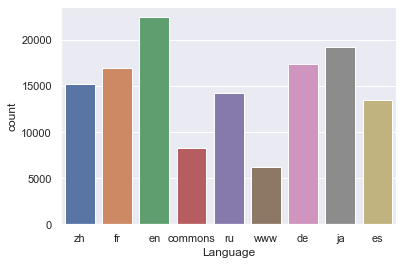

In [16]:
sns.countplot(df['Language'])

This above is the comparision number of articles in each language

{'ja':'Japanese', 'de':'German',  'en' : 'English',  'no_lang':'Media_File',  'fr':'French',  'zh':'Chinese',  'ru':'Russian',  'es':'Spanish'}

<Axes: xlabel='Access_type', ylabel='count'>

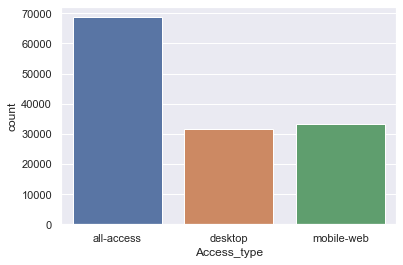

In [17]:
sns.countplot(df['Access_type'])

This comparision shows that usage from desktop and mobile is almost the same

<Axes: xlabel='Access_origin', ylabel='count'>

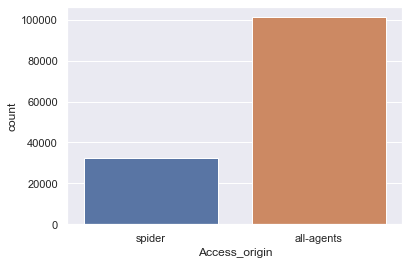

In [18]:
sns.countplot(df['Access_origin'])

This shows that organic view is far more than that of spiders or bots

**Now we want to compare the views for different languages **

In [19]:
#here we see that the languages are not treated properly as there are commons and www
df.groupby('Language').count()

Page  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
Language                                                                      
commons    7672        7672        7672        7672        7672        7672   
de        15946       15946       15946       15946       15946       15946   
en        20758       20758       20758       20758       20758       20758   
es        12268       12268       12268       12268       12268       12268   
fr        15418       15418       15418       15418       15418       15418   
ja        17132       17132       17132       17132       17132       17132   
ru        12955       12955       12955       12955       12955       12955   
www        5743        5743        5743        5743        5743        5743   
zh        14845       14845       14845       14845       14845       14845   

          2015-07-06  2015-07-07  2015-07-08  2015-07-09  ...  2016-12-25  \
Language                                                  ...               
commons         7672        7672        7672        7672  ...        7672   
de             15946       15946       15946       15946  ...       15946   
en             20758       20758       20758       20758  ...       20758   
es             12268       12268       12268       12268  ...       12268   
fr             15418       15418       15418       15418  ...       15418   
ja             17132       17132       17132       17132  ...       17132   
ru             12955       12955       12955       12955  ...       12955   
www             5743        5743        5743        5743  ...        5743   
zh             14845       14845       14845       14845  ...       14845   

          2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
Language                                                               
commons         7672        7672        7672        7672        7672   
de             15946       15946       15946       15946       15946   
en             20758       20758       20758       20758       20758   
es             12268       12268       12268       12268       12268   
fr             15418       15418       15418       15418       15418   
ja             17132       17132       17132       17132       17132   
ru             12955       12955       12955       12955       12955   
www             5743        5743        5743        5743        5743   
zh             14845       14845       14845       14845       14845   

          2016-12-31  Title  Access_type  Access_origin  
Language                                                 
commons         7672   8266         8266           8266  
de             15946  17362        17362          17362  
en             20758  22486        22486          22486  
es             12268  13551        13551          13551  
fr             15418  16948        16948          16948  
ja             17132  19295        19295          19295  
ru             12955  14270        14270          14270  
www             5743   6228         6228           6228  
zh             14845  15211        15211          15211  

[9 rows x 554 columns]

In [20]:
df[df['Language']=='commons']

Page  2015-07-01  \
12271    Burning_Man_en.britanica.org_desktop_all-agents      1693.0   
12272    Cali_Cartel_en.britanica.org_desktop_all-agents       348.0   
12273  Call_of_Duty:_Modern_Warfare_2_en.britanica.or...       806.0   
12274  Calvin_Harris_en.britanica.org_desktop_all-agents      7114.0   
12275     Carl_Sagan_en.britanica.org_desktop_all-agents      1808.0   
...                                                  ...         ...   
75129                                                NaN         NaN   
75150                                                NaN         NaN   
75178                                                NaN         NaN   
75237                                                NaN         NaN   
75253                                                NaN         NaN   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
12271      1490.0      1186.0      1099.0      1051.0      1968.0      1874.0   
12272       363.0       214.0       252.0       257.0       320.0       340.0   
12273       768.0       700.0       725.0       723.0       823.0       849.0   
12274      5599.0      7685.0     15844.0      9390.0      7173.0      5499.0   
12275      1759.0      1838.0      1631.0      1701.0      2230.0      2052.0   
...           ...         ...         ...         ...         ...         ...   
75129         NaN         NaN         NaN         NaN         NaN         NaN   
75150         NaN         NaN         NaN         NaN         NaN         NaN   
75178         NaN         NaN         NaN         NaN         NaN         NaN   
75237         NaN         NaN         NaN         NaN         NaN         NaN   
75253         NaN         NaN         NaN         NaN         NaN         NaN   

       2015-07-08  2015-07-09  ...  2016-12-26  2016-12-27  2016-12-28  \
12271      1637.0      1842.0  ...       940.0      2976.0      2447.0   
12272       345.0       432.0  ...      1197.0      1449.0      1376.0   
12273       731.0       833.0  ...       818.0       929.0       892.0   
12274      6367.0      5630.0  ...      1242.0      1409.0      1714.0   
12275      2065.0      2002.0  ...      1425.0      1730.0      1858.0   
...           ...         ...  ...         ...         ...         ...   
75129         NaN         NaN  ...         NaN         NaN         NaN   
75150         NaN         NaN  ...         NaN         NaN         NaN   
75178         NaN         NaN  ...         NaN         NaN         NaN   
75237         NaN         NaN  ...         NaN         NaN         NaN   
75253         NaN         NaN  ...         NaN         NaN         NaN   

       2016-12-29  2016-12-30  2016-12-31  \
12271      1648.0      1282.0       956.0   
12272      1350.0      1287.0       992.0   
12273       878.0       893.0       712.0   
12274      1604.0      1602.0      1300.0   
12275      1781.0      1718.0      1345.0   
...           ...         ...         ...   
75129         NaN         NaN         NaN   
75150         NaN         NaN         NaN   
75178         NaN         NaN         NaN   
75237         NaN         NaN         NaN   
75253         NaN         NaN         NaN   

                                               Title  Language  Access_type  \
12271                                        Accueil   commons   all-access   
12272                                  Atlas of Asia   commons   all-access   
12273                                Atlas of Europe   commons   all-access   
12274                          Atlas of World War II   commons   all-access   
12275                           Atlas of colonialism   commons   all-access   
...                                              ...       ...          ...   
75129  File:Zyworodka - Kalanchoe daigremontiana JPG   commons      desktop   
75150                   Commons:Open proxy detection   commons      desktop   
75178      File:Crabs (Pachygrapsus marmoratus) webm   commons      deskt

In [21]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].britanica.org',Page)
    if val:
        #print(val)
        #print(val[0][0:2] )

        return val[0][0:2]

    return 'no_lang'

df['Language']=df['Page'].apply(lambda x: lang(str(x)))

In [22]:
df.groupby('Language').count() #now the count has increased. You can go back and get it sorted

Page  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
Language                                                                      
de        17362       17362       17362       17362       17362       17362   
en        22486       22486       22486       22486       22486       22486   
es        13551       13551       13551       13551       13551       13551   
fr        16948       16948       16948       16948       16948       16948   
ja        19295       19295       19295       19295       19295       19295   
no_lang   14494       14494       14494       14494       14494       14494   
ru        14270       14270       14270       14270       14270       14270   
zh        15211       15211       15211       15211       15211       15211   

          2015-07-06  2015-07-07  2015-07-08  2015-07-09  ...  2016-12-25  \
Language                                                  ...               
de             17362       17362       17362       17362  ...       17362   
en             22486       22486       22486       22486  ...       22486   
es             13551       13551       13551       13551  ...       13551   
fr             16948       16948       16948       16948  ...       16948   
ja             19295       19295       19295       19295  ...       19295   
no_lang        14494       14494       14494       14494  ...       14494   
ru             14270       14270       14270       14270  ...       14270   
zh             15211       15211       15211       15211  ...       15211   

          2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
Language                                                               
de             17362       17362       17362       17362       17362   
en             22486       22486       22486       22486       22486   
es             13551       13551       13551       13551       13551   
fr             16948       16948       16948       16948       16948   
ja             19295       19295       19295       19295       19295   
no_lang        14494       14494       14494       14494       14494   
ru             14270       14270       14270       14270       14270   
zh             15211       15211       15211       15211       15211   

          2016-12-31  Title  Access_type  Access_origin  
Language                                                 
de             17362  13046        13046          13046  
en             22486  22486        22486          22486  
es             13551  10142        10142          10142  
fr             16948  16948        16948          16948  
ja             19295  16140        16140          16140  
no_lang        14494  25374        25374          25374  
ru             14270  14270        14270          14270  
zh             15211  15211        15211          15211  

[8 rows x 554 columns]

In [23]:
df_language=df.groupby('Language').mean().transpose()
df_language

Language             de           en           es          fr           ja  \
2015-07-01   763.765926  3767.328604  1127.485204  499.092872   614.637160   
2015-07-02   753.362861  3755.158765  1077.485425  502.297852   705.813216   
2015-07-03   723.074415  3565.225696   990.895949  483.007553   637.451671   
2015-07-04   663.537323  3711.782932   930.303151  516.275785   800.897435   
2015-07-05   771.358657  3833.433025  1011.759575  506.871666   768.352319   
...                 ...          ...          ...         ...          ...   
2016-12-27  1119.596936  6314.335275  1070.923400  840.590217   808.541436   
2016-12-28  1062.284069  6108.874144  1108.996753  783.585379   807.430163   
2016-12-29  1033.939062  6518.058525  1058.660320  763.209169   883.752786   
2016-12-30   981.786430  5401.792360   807.551177  710.502773   979.278777   
2016-12-31   937.842875  5280.643467   776.934322  654.060656  1228.720808   

Language       no_lang          ru          zh  
2015-07-01  102.733545  663.199229  272.498521  
2015-07-02  107.663447  674.677015  272.906778  
2015-07-03  101.769629  625.329783  271.097167  
2015-07-04   86.853871  588.171829  273.712379  
2015-07-05   96.254105  626.385354  291.977713  
...                ...         ...         ...  
2016-12-27  155.270181  998.374071  363.066991  
2016-12-28  178.561267  945.054730  369.049701  
2016-12-29  150.873534  909.352207  340.526330  
2016-12-30  156.049193  815.475123  342.745316  
2016-12-31  135.792052  902.600210  352.184275  

[550 rows x 8 columns]

In [24]:
df_language.reset_index(inplace=True)
df_language.set_index('index', inplace=True)

Text(0, 0.5, 'Views per Page')

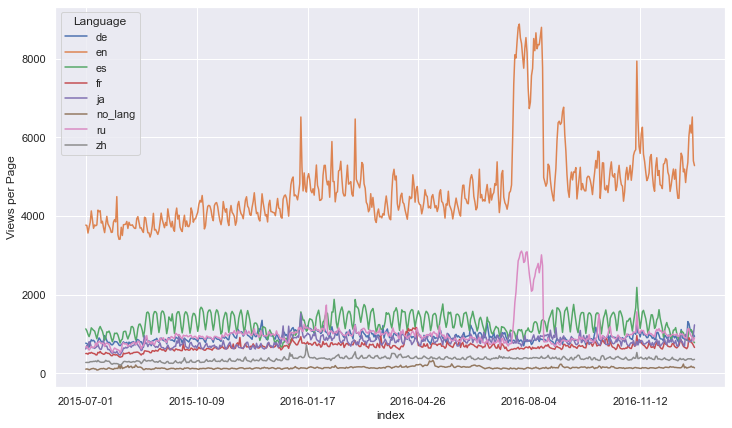

In [25]:
df_language.plot(figsize=(12,7))
plot.ylabel('Views per Page')

Ploting the data shows that articles in english get the most number of views as compared to different languages, there are some spikes at different times in different laguages

Ploting just for english because we are going to use this for our furthur investigation and predictions

Text(0, 0.5, 'Views per Page')

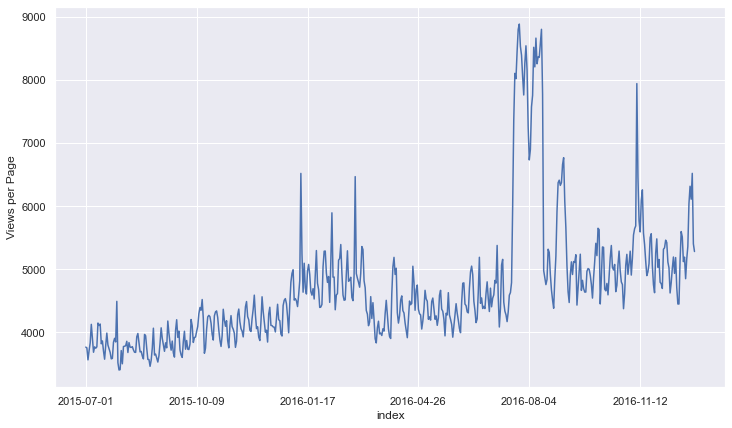

In [26]:
df_language['en'].plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [27]:
total_view=df_language.copy()

In [28]:
#################################################################################################################################

# Checking the stationarity

Dickey-Fuller test

**Here the null hypothesis is that the TS is non-stationary**:
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.


In [29]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])

df_test(total_view['en'])

ADF Stastistic: -2.373563
p-value: 0.149337


We see that the p value is not low enough(<0.05). Therefore, we can say our series in not stationary as we fail to reject the null hypothesis

# Making the time series stationary


In [30]:
ts=total_view['en']

## 1. Remove trend and seasonality with decomposition

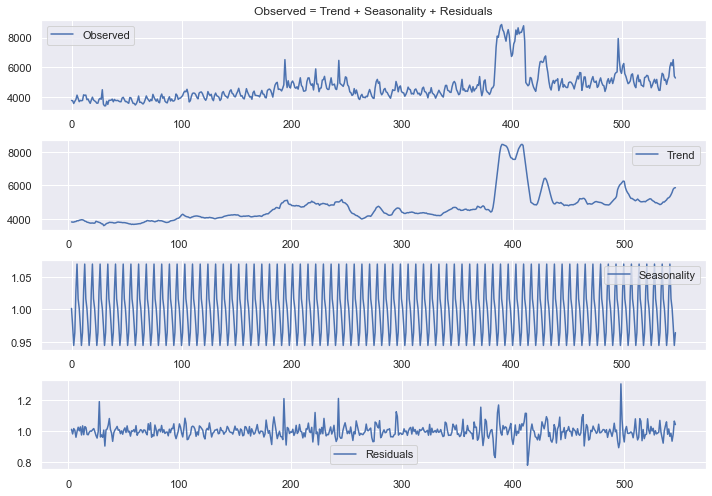

In [31]:
# Naive decomposition of our Time Series as explained above
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts.values, model='multiplicative', period=7)

""" Additive or multiplicative?
  It’s important to understand what the difference between a multiplicative time series and an additive one before we go any further.

  There are three components to a time series:
  – trend how things are overall changing
  – seasonality how things change within a given period e.g. a year, month, week, day
  – error/residual/irregular activity not explained by the trend or the seasonal value

  How these three components interact determines the difference between a multiplicative and an additive time series.

  In a multiplicative time series, the components multiply together to make the time series. If you have an increasing trend, the amplitude of seasonal activity increases. Everything becomes more exaggerated. This is common when you’re looking at web traffic.

  In an additive time series, the components add together to make the time series. If you have an increasing trend, you still see roughly the same size peaks and troughs throughout the time series. This is often seen in indexed time series where the absolute value is growing but changes stay relative.


"""

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plot.figure(figsize=(10,7))
plot.subplot(411)
plot.title('Observed = Trend + Seasonality + Residuals')
plot.plot(ts.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

In [32]:
ts_decompose=pd.DataFrame(residual).fillna(0)[0].values
df_test(ts_decompose)

ADF Stastistic: -3.796320
p-value: 0.002945


We can see that aur series is now stationary, we can also try diffrencing to see what results we can get.

# 2. Remove trend and seasonality with differencing


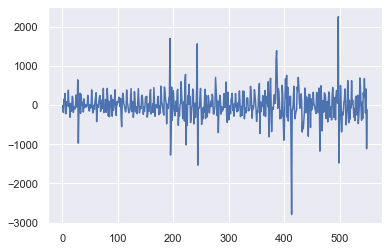

In [33]:
ts_diff = ts - ts.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [34]:
ts_diff.dropna(inplace=True)
df_test(ts_diff)

ADF Stastistic: -8.273590
p-value: 0.000000


 Also the p value is 0. So we can say that our graph is now stationery.
Now we can apply the ARIMA model

**How do we choose p,d,q**

a thumb rule that for choosing the p,q values are when the lag goes below the significant level
- we use PACF for p, here we see that till lag 5 there are significat lines, if we want our model to be simpler we can start with a smaller number like 3/4
- we use ACF for q. here we can see that lag 4 is below significant level so we will use till lag 3


as for d we can see that at 1 diffencing the series becomes stationary so we choose d as 1

# Plot the autocorreltaion and partial auto correlation functions

Plotting the graphs and getting the p,q,d values for arima

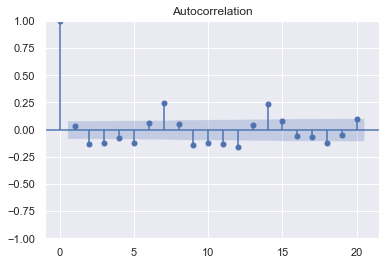

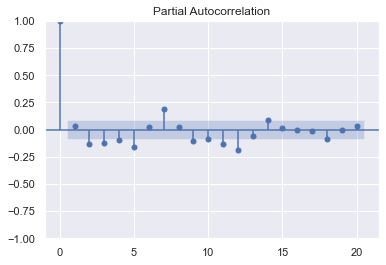

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

https://people.duke.edu/~rnau/411arim3.htm

# ARIMA MODEL

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [37]:
model = ARIMA(ts, order=(4,1,3))
model_fit = model.fit()

C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


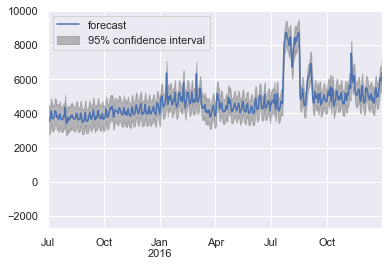

In [38]:
#model_fit.plot_predict(dynamic=False)
plot_predict(model_fit, dynamic=False)
"""When you set dynamic=True, the model continuously predicts one-step ahead (t+1) and then for the 2nd step ahead (t+2) prediction, it appends predicted value (t+1) to data, re-fits model on new expanded data then makes 2nd step ahead forecast. This is called out-of-sample prediction.

When you set dynamic=False, the model sequentially predicts one-step-ahead using the true value from previous time step instead of using predicted value. This is called in-sample prediction.

On your first comparison of plots as you predict from 509 to 533, the reason you get same plots is you are extrapolating, you do not have true values of next 24 steps that you predicted therefor regardless of setting dynamic either True or False model uses out-of-sample approach.

Since out-of-sample approach uses the last predicted value from the previous time step to predict the next value in time, as number of steps get farther, it is expected to deviate from actual values because on each step's prediction fitted model learns previous predicted step's errors as well.
"""
plot.show()

**Multistep forecasting**

In [39]:
train = ts[:-20]
test = ts[-20:]

C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


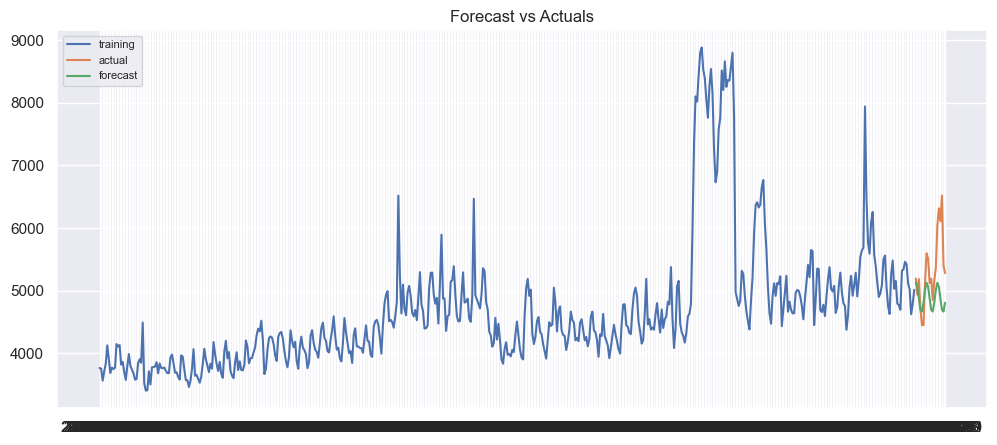

In [49]:
model = ARIMA(train, order=(4, 1, 3))
fitted = model.fit()

# Forecast
#fc, se, conf = fitted.forecast(20, alpha=0.02)
fc = fitted.forecast(20, alpha=0.02)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [50]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.08968383450629815
rsme: 682.6078126759132


we can see that the model does not perform very well for multistep out sample data

from the decomposition we can see that there is a weekly seasonality and still some spikes in the residual, that may be because of some external factors, which we can take into account by using them as our exogenous variable

In [51]:
!gdown 1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u


Downloading...
From: https://drive.google.com/uc?id=1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u
To: E:\1.SCALER\Classes\BusinessCase Studies\12.AdEase Time Series\Exog_Campaign_eng

  0%|          | 0.00/1.10k [00:00<?, ?B/s]
100%|##########| 1.10k/1.10k [00:00<?, ?B/s]


In [52]:
ex_df = pd.read_csv('Exog_Campaign_eng')
ex_df.head()

Exog
0     0
1     0
2     0
3     0
4     0

We get the exogenous data from this csv file for english pages

In [53]:
exog=ex_df['Exog'].to_numpy()


we will train a sarimax model for that and see if we get anyimprovements from using the two information.

the seasonal order and the values of PDQ are based upon various trials and comparision of the models
- we see a seasonality of 7 from the plots ie: weekly seasonality ( from the plots we can see that afte some insignificant plots we have some significant values repeating at intervals of 7 ie: 7,14 ... )
- the non seasonal order we can keep the same

C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


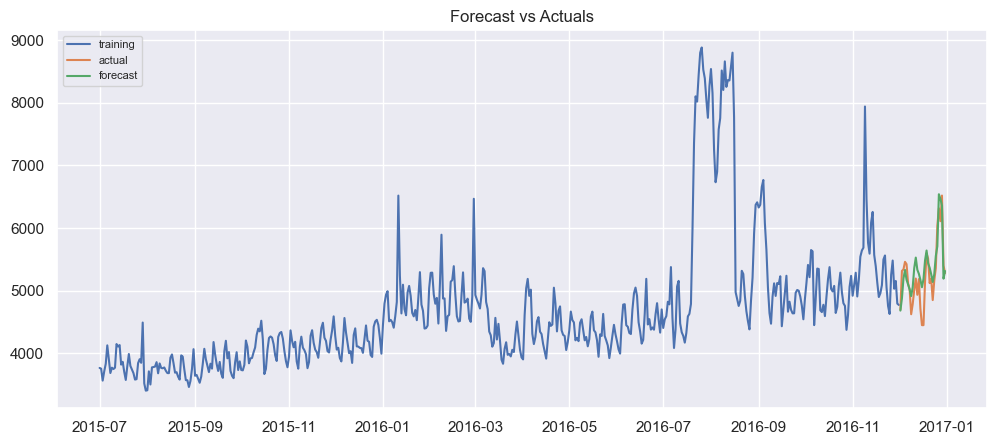

In [54]:
import statsmodels.api as sm
train=ts[:520]
test=ts[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [55]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.047200603636135895
rsme: 296.745953856052


The mean absolute percentage error and the root mean squared error is low

# regression for a time series

In [56]:
ts_df=ts.to_frame()
ts_df.head()

en
index                  
2015-07-01  3767.328604
2015-07-02  3755.158765
2015-07-03  3565.225696
2015-07-04  3711.782932
2015-07-05  3833.433025

In [57]:
ts_df.reset_index(level=0, inplace=True)
ts_df['date']=pd.to_datetime(ts_df['index'])
ts_df.drop(['index'],axis=1,inplace=True)
ts_df.head()

en       date
0  3767.328604 2015-07-01
1  3755.158765 2015-07-02
2  3565.225696 2015-07-03
3  3711.782932 2015-07-04
4  3833.433025 2015-07-05

In [58]:
ts_df['day_of_week']=ts_df['date'].dt.day_name()
ts_df.head()


en       date day_of_week
0  3767.328604 2015-07-01   Wednesday
1  3755.158765 2015-07-02    Thursday
2  3565.225696 2015-07-03      Friday
3  3711.782932 2015-07-04    Saturday
4  3833.433025 2015-07-05      Sunday

In [59]:
ts_df=pd.get_dummies(ts_df, columns = ['day_of_week'])

In [60]:
ts_df.head()

en       date  day_of_week_Friday  day_of_week_Monday  \
0  3767.328604 2015-07-01                   0                   0   
1  3755.158765 2015-07-02                   0                   0   
2  3565.225696 2015-07-03                   1                   0   
3  3711.782932 2015-07-04                   0                   0   
4  3833.433025 2015-07-05                   0                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     1   
2                     0                   0                     0   
3                     1                   0                     0   
4                     0                   1                     0   

   day_of_week_Tuesday  day_of_week_Wednesday  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0

In [61]:
ts_df['exog']=ex_df['Exog']
ts_df['rolling_mean']=ts_df['en'].rolling(7).mean()

In [62]:
ts_df=ts_df.dropna()
ts_df.head()

en       date  day_of_week_Friday  day_of_week_Monday  \
6   3906.341724 2015-07-07                   0                   0   
7   3685.854621 2015-07-08                   0                   0   
8   3771.183714 2015-07-09                   0                   0   
9   3749.860313 2015-07-10                   1                   0   
10  3770.749355 2015-07-11                   0                   0   

    day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
6                      0                   0                     0   
7                      0                   0                     0   
8                      0                   0                     1   
9                      0                   0                     0   
10                     1                   0                     0   

    day_of_week_Tuesday  day_of_week_Wednesday  exog  rolling_mean  
6                     1                      0     0   3809.528545  
7                     0                      1     0   3797.889404  
8                     0                      0     0   3800.178683  
9                     0                      0     0   3826.555056  
10                    0                      0     0   3834.978831

In [63]:
X=ts_df[['day_of_week_Friday',	'day_of_week_Monday',	'day_of_week_Saturday',	'day_of_week_Sunday',	'day_of_week_Thursday',	'day_of_week_Tuesday',	'day_of_week_Wednesday',	'exog',	'rolling_mean']].copy()
y=ts_df[['en']]

train_x = X[:-20]
test_x = X[-20:]

train_y = y[:-20]
test_y = y[-20:]


In [64]:
from sklearn.linear_model import LinearRegression

# Train and pred
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = (model.predict(test_x))


mape = np.mean(np.abs(y_pred - test_y.values)/np.abs(test_y.values))
print("mape:",mape)


mape: 0.04523968736329448


We can see here that aur mape is better than our arima model but worse than our sarimax model

- Linear Regression Is Limited to Linear Relationships and in our case there is not a lot of linear relationship.
- it would have been better to use a regression based model for forecasting if we can build some better features.
- we have our series data and the exogenous variables, we add the day of week feature, other than that there are not a lot of features that we can build

# using Facebook Prophet

In [65]:
!pip install pystan~=2.14
!pip install fbprophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan
  Running setup.py install for pystan: started
  Running setup.py install for pystan: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [21248 lines of output]
  Compiling pystan/_api.pyx because it depends on C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\Cython\Includes\libcpp\vector.pxd.
  Compiling pystan/_chains.pyx because it depends on C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\Cython\Includes\libcpp\vector.pxd.
  [1/2] Cythonizing pystan/_api.pyx
  [2/2] Cythonizing pystan/_chains.pyx
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\pystan
  copying pystan\api.py -> build\lib.win-amd64-cpython-310\pystan
  copying pystan\chains.py -> build\lib.win-amd64-cpython-310\pystan
  copying pystan\constants.py -> build\lib.win-amd64-cpython-310\pystan
  copying pystan\diagnostics.py -> build\lib.win-amd64-cpython-310\pystan
  copying pysta

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached pysimdjson-5.0.2-cp310-cp310-win_amd64.whl (155 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached aiohttp-3.9.3-cp310-cp310-win_amd64.whl (365 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pys

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [55 lines of output]
  C:\Users\PARTHA\AppData\Local\Temp\pip-install-s9z6y9rg\fbprophet_47189f93c62443f2976b4da10e282580\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\PARTHA\AppData\Local\Temp\pip-install-s9z6y9rg\fbprophet_47189f93c62443f2976b4da10e282580\setup.py", line 122, in <module>
      setup(
    File "C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\__init__.py", line 103, in setup
      retur

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\detail\sequence_to_seq.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\detail\sequence_to_tuple.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\detail\sequence_type.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\detail\setup.hpp -> build\lib.win-amd64-cpython-310\p

In [66]:
ts_df['ds']=ts_df['date']
ts_df['y']=ts_df['en']

In [67]:
df2=ts_df[['date','en','exog']].copy()
df2.columns = ['ds', 'y', 'exog']
df2.head()

ds            y  exog
6  2015-07-07  3906.341724     0
7  2015-07-08  3685.854621     0
8  2015-07-09  3771.183714     0
9  2015-07-10  3749.860313     0
10 2015-07-11  3770.749355     0

In [68]:
df2[:-20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 6 to 529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      524 non-null    datetime64[ns]
 1   y       524 non-null    float64       
 2   exog    524 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.4 KB


prophet without exogenous

In [71]:
pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-5.0.2-cp310-cp310-win_amd64.whl (155 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached aiohttp-3.9.3-cp310-cp310-win_amd64.whl (365 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached py

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [55 lines of output]
  C:\Users\PARTHA\AppData\Local\Temp\pip-install-qd5t83q4\fbprophet_79c3e1ada66b43ada0a18cdf1f60f114\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\PARTHA\AppData\Local\Temp\pip-install-qd5t83q4\fbprophet_79c3e1ada66b43ada0a18cdf1f60f114\setup.py", line 122, in <module>
      setup(
    File "C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\__init__.py", line 103, in setup
      retur

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\iter_push_front.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\graph\distributed\shuffled_distribution.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\graph\distributed
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\graph\distributed\st_connected.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\graph\distributed
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\graph\distributed\strong_compone

In [72]:
from fbprophet import Prophet
m = Prophet(weekly_seasonality=True)
m.fit(df2[['ds', 'y']][:-20])
future = m.make_future_dataframe(periods=20,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

ModuleNotFoundError: No module named 'fbprophet'

prophet with exogenous

In [ ]:
model2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)
model2.add_regressor('exog')
model2.fit(df2[:-20])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

In [ ]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

plot.plot(y_true, label='Actual')
plot.plot(y_pred, label='Predicted')
plot.legend()
plot.show()

In [ ]:
mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

- Prophet does not perform well on non-stationary data because it is difficult to find the actual seasonality and trend of the data if the patterns are inconsistent.

# ------------------------------------------------------------------------------------------------------------------------------------------

# Comparing the predicted views for different languages

**For doing this we are going to automate the procedure from loading the separate data for each langauge to doing out of sample forecasting for the next month, and then comparing the results.**

In [ ]:
def grid_search(ts):
    v=[0,1,2,3]
    mape=100
    val=[0,0,0]
    for p in v:
        for d in v:
            for q in v:
                try:
                    model = ARIMA(ts[:-20], order=(p,d,q))
                    model_fit = model.fit(disp=-1)
                    fc, se, conf = model_fit.forecast(20, alpha=0.02)
                    x = np.mean(np.abs(fc - ts[-20:].values)/np.abs(ts[-20:].values))
                    if(x<mape):
                        mape=x
                        val=[p,d,q]

                except:
                    pass

    return(mape, val)

This functions works like a grid search for getting the best value of p,d,q by comparing the mape  of all models that we create.

the values of p,d,q that give the least mape score are saved and returned

In [ ]:
def all_arima(train,test,val):
    model = ARIMA(train, order=(val[0], val[1], val[2]))
    fitted = model.fit(disp=-1)

  # Forecast
    fc, se, conf = fitted.forecast(30, alpha=0.02)



    fc_series = pd.Series(fc, index=test.index)

  # Plot
    plot.figure(figsize=(12,5), dpi=100)
    plot.plot(train, label='training')
    plot.plot(test, label='actual')
    plot.plot(fc_series, label='forecast')
    plot.title('Forecast vs Actuals')
    plot.legend(loc='upper left', fontsize=8)
    plot.show()
    mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
    rmse = np.mean((fc - test.values)**2)**.5
    print("mape:",mape)
    print("rsme:",rmse)
    return (fc)


This function takes the p,d,q values that we calculated earlier and then trains a model on it, does forecast and plots them for visualization.

it also calculates the sum of forecased views for the next 30 days and returns it back

In [ ]:
import warnings
warnings.filterwarnings("ignore")
views_prediction={}
for c in total_view:
    print("language: ",c)
    ts=(total_view[c])
    mape,val=grid_search(ts)
    print(mape,val)
    train = ts[:520]
    test = ts[520:]
    fc=all_arima(train,test,val)
    views_prediction[c]=fc








* This function is what calls and drives all the other functions.

* It first gets the data for a particular language.

* checks stationarity.

* Gets the optimal p,d,q values from grid search

* uses that value to train the model, forecast and plot it

